# Week 03: More analysis with the fish dataset

See lecture slides for more info about how this dataset was collected.

### Topics:
 1. Revisit Fish data, croatian imports
 1. Further data exploration and some beginning Stats Functions: Plotting by time & dataframes in R


Resize plots:

In [1]:
require(repr)
options(repr.plot.width=10, repr.plot.height=4)

Loading required package: repr


## 1. Revisit Fish data, croatian imports

Like last time, we'll read in the fishdata (it is stored in last week's folder):

In [2]:
fishdata = read.csv("../week02/undata_fish_2020.csv")

Make sure this is stored somewhere you can remember!  You can put it in the same directory as this file (or whatever R-script you are working from) or you can specify a location.  For example, on my Mac I can specify the default `Downloads` folder as the location with:

```r
fishdata = read.csv("~/Downloads/undata_fish_2020.csv")
```

Let's make some vectors out of this data - you can use the data as a dataframe (which we'll get to later) but since many folks have a Python background, we might be more used to doing things with vectors:

In [8]:
# make some vectors, first country:
country = fishdata[,1]
# how about year of data?
year = fishdata[,2]
# how about type of fish
type = fishdata[,3]
# how about transaction type? (import, export, re-export/import)
transaction = fishdata[,4]
# how about the cash amount of the transaction?
trade_usd = fishdata[,5]
# how about the weight of the fish in kg?
weight = fishdata[,6]
# how about the quantity name?
quant_name = fishdata[,7] # some of of the "quantity" measures are weight, or # of items, or nothing

Last time, we worked on several, increasingly complicated subset operations, looking at imports and exports in Croatia.

First, just all transactions in Croatia:

In [9]:
mask = country=="Croatia" 
trade_usd_croatia = subset(trade_usd,mask)

Making sure all transactions are in kg:

In [10]:
mask = (country=="Croatia") & (quant_name == "Weight in kilograms")
trade_usd_croatia_kg = subset(trade_usd,mask)

Imports alone:

In [11]:
mask = (country=="Croatia") & (quant_name == "Weight in kilograms") & (transaction == "Import")
trade_usd_croatia_kg_import = subset(trade_usd,mask)

And exports:

In [12]:
mask = (country=="Croatia") & (quant_name == "Weight in kilograms") & (transaction == "Export")
trade_usd_croatia_kg_export = subset(trade_usd,mask)

Finally, we made a plot comparing all of these subsequent subsets:

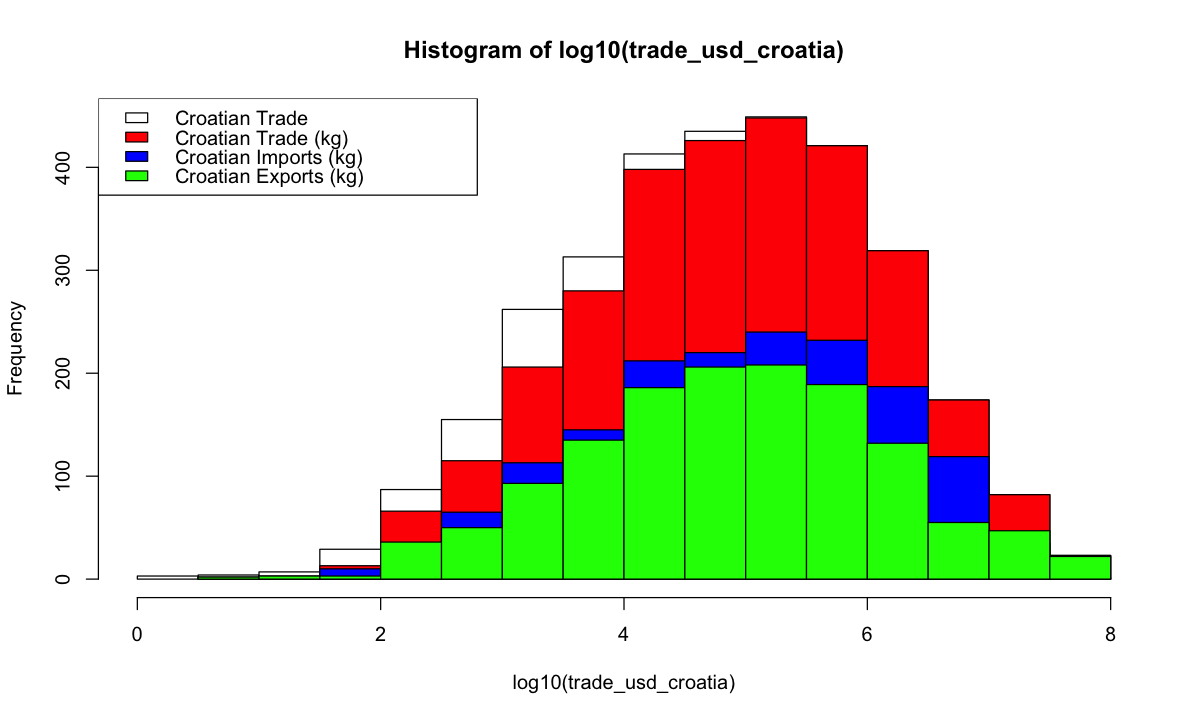

In [13]:
options(repr.plot.width=10, repr.plot.height=6)

hist(log10(trade_usd_croatia))

hist(log10(trade_usd_croatia_kg),col=rgb(1,0,0),add=T) 

hist(log10(trade_usd_croatia_kg_import),col=rgb(0,0,1),add=T)

hist(log10(trade_usd_croatia_kg_export),col=rgb(0,1,0),add=T)

# and, obviously, update our legend:
legend("topleft",c("Croatian Trade","Croatian Trade (kg)", 
                   "Croatian Imports (kg)", "Croatian Exports (kg)"),
       fill=c(rgb(1,1,1),rgb(1,0,0),rgb(0,0,1),rgb(0,1,0)))

We also looked at summary stats for our different subsets:

In [14]:
print(summary(trade_usd_croatia))
print(summary(trade_usd_croatia_kg))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       1     8118    74396  1375985   538727 77440578 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       7    12107    94297  1468056   619837 77440578 


In [15]:
print('IMPORTS')
print(summary(trade_usd_croatia_kg_import))
print('EXPORTS')
print(summary(trade_usd_croatia_kg_export))

[1] "IMPORTS"
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
      49    12907   105273  1115864   686450 35298642 
[1] "EXPORTS"
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       7    11477    85244  1882598   547928 77440578 


In [16]:
print(sd(trade_usd_croatia_kg_import))
print(sd(trade_usd_croatia_kg_export))

[1] 3053592
[1] 7065054


## 2. Further data exploration and some beginning Stats Functions: Plotting by time & dataframes in R

We can also check out relationships between the data in other ways, like how things change over time.

To make sure we are comparing like-to-like, we should also apply whatever mask we are using to our time variable.

Let's say we want to see how Croatian imports change with time:

In [37]:
mask = (country=="Croatia") & (quant_name == "Weight in kilograms") & (transaction == "Import")
year_croatia_import_kg = subset(year, mask)

Now we can plot the imports into Croatia as a function of time:

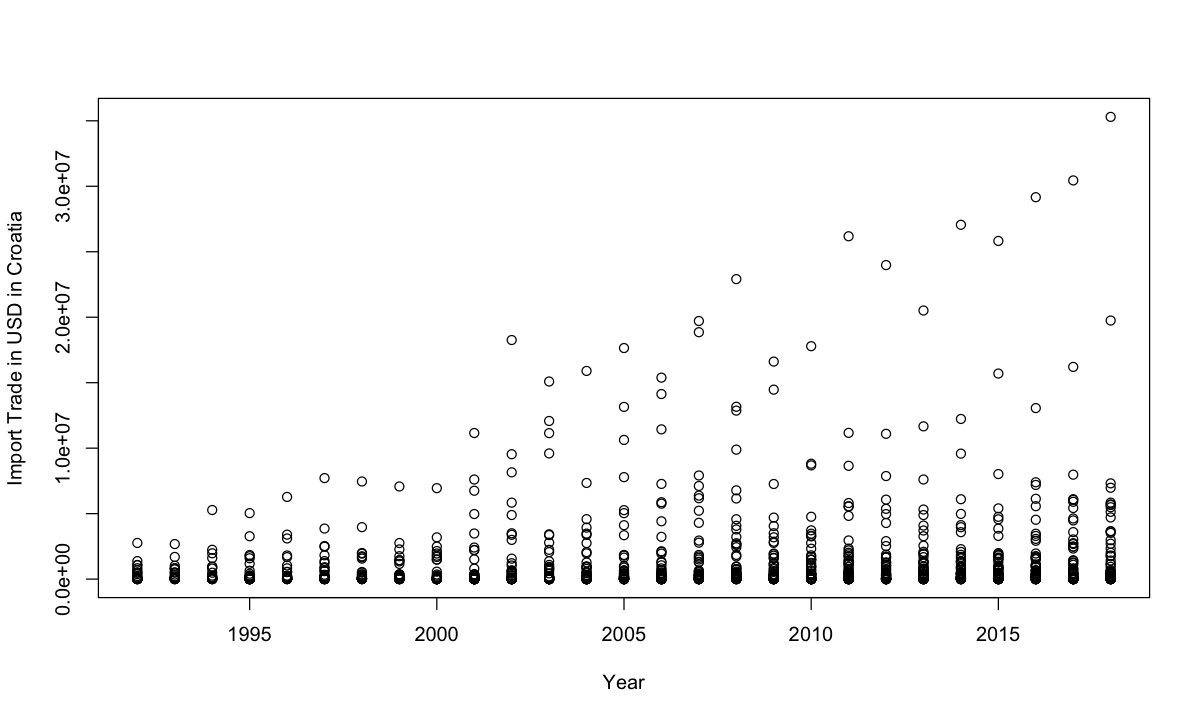

In [38]:
plot(year_croatia_import_kg,trade_usd_croatia_kg_import, xlab="Year",ylab="Import Trade in USD in Croatia")

So this has multiple values - what are they?  They are for each type of fish throughout the years.

If we want to sum along each year there are plenty of fancy ways to do this.

One thing that is nice about R is its use of dataframes.  We'll work more with this later, but as an intro, we could either use our original dataframe, or create a new dataframe out of our subset data.  Let's try the last option.

First, lets take a look at our original dataframe:

In [39]:
head(fishdata)

Country.or.Area,Year,Commodity,Flow,Trade..USD.,Weight..kg.,Quantity.Name,Quantity
Afghanistan,2018,"Ornamental fish, live",Import,9192.23,NA,Weight in kilograms,407.7688
Afghanistan,2018,"Sea bass, frozen, whole",Import,6786967.47,4344713,Weight in kilograms,4344713.0000
Afghanistan,2010,"Trout, fresh or chilled, whole",Import,8600.00,9000,Weight in kilograms,9000.0000
Albania,2018,"Fish live, except trout, eel or carp",Import,1078690.80,24697,Weight in kilograms,24697.0000
Albania,2018,"Salmon fresh or chilled, whole",Import,773056.58,114155,Weight in kilograms,114154.9800
Albania,2018,"Sardines,brisling,sprats, fresh or chilled, whole",Import,228462.59,251698,Weight in kilograms,251698.0000


Also try: `fishdata$` and see what autocompletes in RStudio.

Let's subset into a new frame based on the masks we used before:

In [40]:
mask = (fishdata$Country.or.Area == "Croatia") & (fishdata$Quantity.Name == "Weight in kilograms") & (fishdata$Flow == "Import")
croatianImports = subset(fishdata,mask)

In [41]:
head(croatianImports)

,Country.or.Area,Year,Commodity,Flow,Trade..USD.,Weight..kg.,Quantity.Name,Quantity
78426,Croatia,2018,"Ornamental fish, live",Import,145385,1615.025,Weight in kilograms,1615.025
78427,Croatia,2018,"Trout, live",Import,114501,24870.360,Weight in kilograms,24870.360
78428,Croatia,2018,"Eels, live",Import,2573,129.000,Weight in kilograms,129.000
78430,Croatia,2018,"Fish live, except trout, eel or carp",Import,4708484,69518.190,Weight in kilograms,69518.190
78432,Croatia,2018,"Trout, fresh or chilled, whole",Import,1801978,469054.670,Weight in kilograms,469054.670
78434,Croatia,2018,"Salmon fresh or chilled, whole",Import,3628829,442033.370,Weight in kilograms,442033.370


So you can see from the above that we get the same type of dataframe, or data list, except now if we do `croatianImports$Country.or.Area` in RStudio its only Croatia:

In [43]:
head(croatianImports$Country.or.Area)

[1] Croatia Croatia Croatia Croatia Croatia Croatia
59 Levels: Afghanistan Albania Algeria Andorra Angola ... El Salvador

We'll talk more about functions later, so don't worry if this doesn't make sense now, but we can use something called the `aggregate` function to aggregate the "Trade USD" variable in our dataframe by year:

In [44]:
tradeUSD_by_year = aggregate(Trade..USD. ~ Year, data=croatianImports, sum)

What does that ~ mean??  In this case it means "aggregate Trade USD by Year".  But in other functions it means different things! We'll look at this later in class as well when we start thinking about linear regression.

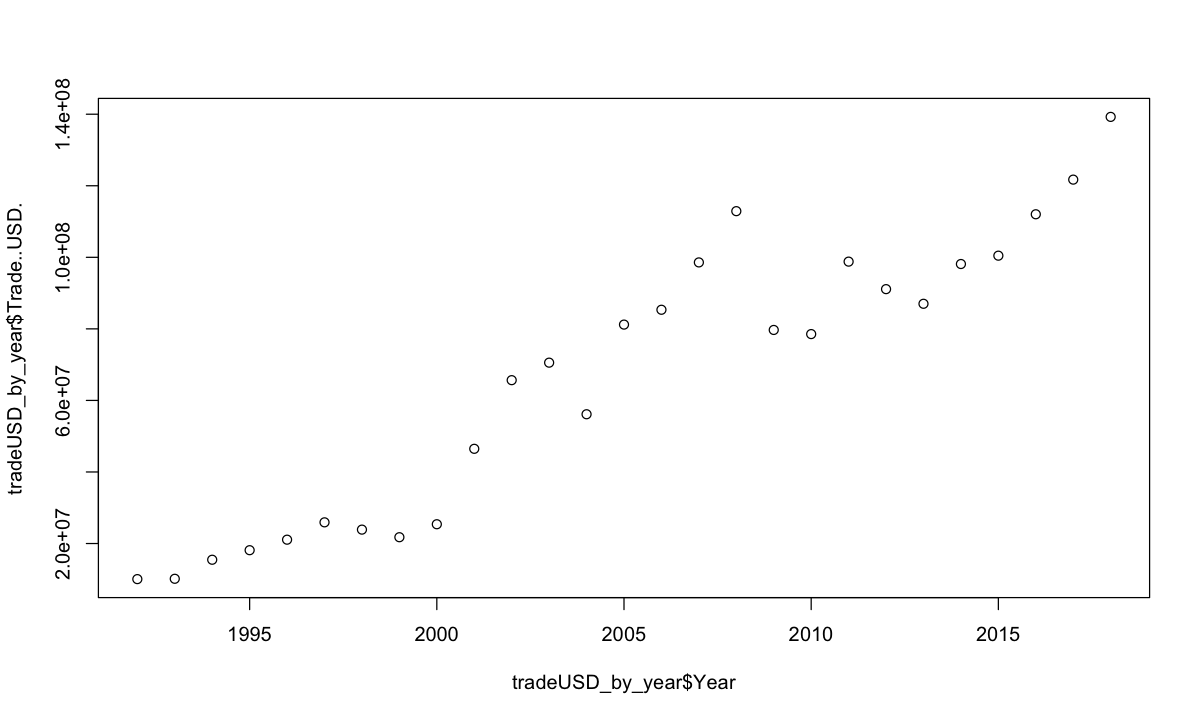

In [45]:
plot(tradeUSD_by_year$Year, tradeUSD_by_year$Trade..USD.)

We could do fancier aggregates with our base data, but for now, this was just a taste.

#### EXTRA:

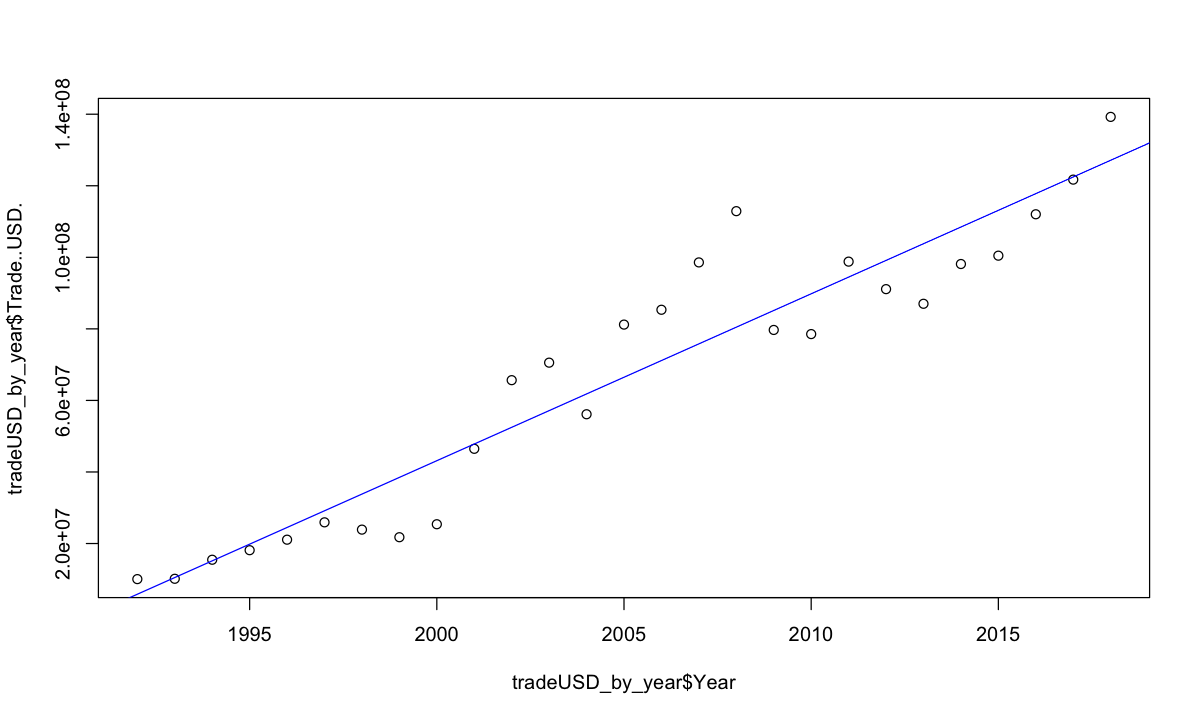

In [47]:
myfit = lm(tradeUSD_by_year$Trade..USD. ~ tradeUSD_by_year$Year)

plot(tradeUSD_by_year$Year, tradeUSD_by_year$Trade..USD.)
abline(myfit, col='blue')

`lm` - is a linear model this model a good fit?  We'll quantify this later!